In [1]:
#using Revise
addprocs(15)
using LightDarkPOMDPs, CMDPs
using POMDPs, POMDPToolbox, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
mdp = LightDark2D()
b = CBTSDPWBandit(mdp)
solver = ModularSolver(mdp, b)
policy = solve(solver, mdp);

In [3]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

2-element StaticArrays.SArray{Tuple{2},Float64,1,2}:
 2.0
 2.0

In [4]:
hr = HistoryRecorder(; max_steps=10, rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

In [5]:
h.state_hist

11-element Array{StaticArrays.SArray{Tuple{2},Float64,1,2},1}:
 [2.0, 2.0]             
 [0.956335, 1.26158]    
 [0.110118, 0.836555]   
 [-0.0321038, 0.279826] 
 [0.590089, 0.327654]   
 [0.209984, 0.0645976]  
 [-0.131615, 0.267686]  
 [-0.0113196, -0.592005]
 [0.465562, 1.01867]    
 [-1.26983, 0.275967]   
 [0.342456, -0.0484902] 

In [6]:
h.action_hist

10-element Array{StaticArrays.SArray{Tuple{2},Float64,1,2},1}:
 [-1.04366, -0.738425] 
 [-0.846218, -0.42502] 
 [-0.142221, -0.556729]
 [0.622193, 0.0478286] 
 [-0.380104, -0.263057]
 [-0.3416, 0.203089]   
 [0.120295, -0.859691] 
 [0.476882, 1.61067]   
 [-1.73539, -0.742704] 
 [1.61229, -0.324457]  

In [7]:
h.reward_hist

10-element Array{Float64,1}:
 -4.81725 
 -1.70144 
 -0.521062
 -0.234372
 -0.33462 
 -0.103101
 -0.421259
 -1.58614 
 -2.40882 
 -2.19668 

In [8]:
## Study

In [9]:
study = RewardvsN(LightDark2D)

CMDPs.RewardvsN
  mdp: LightDarkPOMDPs.LightDark2D
  bandits: Array{DataType}((3,))
  n_seeds: Int64 200
  n_iters: Array{Int64}((7,)) [50, 100, 200, 500, 1000, 1500, 2000]
  max_steps: Int64 10


In [10]:
result = run_study(study)

Elapsed time: 3286.223999977112


CMDPs.RewardvsNResult("LightDark2D", 4200×4 DataFrames.DataFrame
│ Row  │ alg           │ seed │ n_iters │ r_total  │
├──────┼───────────────┼──────┼─────────┼──────────┤
│ 1    │ DPWBandit     │ 1    │ 50      │ -11.2386 │
│ 2    │ DPWBandit     │ 2    │ 50      │ -12.0235 │
│ 3    │ DPWBandit     │ 3    │ 50      │ -8.65549 │
│ 4    │ DPWBandit     │ 4    │ 50      │ -12.5248 │
│ 5    │ DPWBandit     │ 5    │ 50      │ -11.9667 │
│ 6    │ DPWBandit     │ 6    │ 50      │ -12.5598 │
│ 7    │ DPWBandit     │ 7    │ 50      │ -9.29834 │
│ 8    │ DPWBandit     │ 8    │ 50      │ -12.2591 │
│ 9    │ DPWBandit     │ 9    │ 50      │ -13.8315 │
│ 10   │ DPWBandit     │ 10   │ 50      │ -11.9884 │
│ 11   │ DPWBandit     │ 11   │ 50      │ -10.0749 │
⋮
│ 4189 │ CBTSDPWBandit │ 189  │ 2000    │ -7.60693 │
│ 4190 │ CBTSDPWBandit │ 190  │ 2000    │ -7.39734 │
│ 4191 │ CBTSDPWBandit │ 191  │ 2000    │ -8.22763 │
│ 4192 │ CBTSDPWBandit │ 192  │ 2000    │ -7.57663 │
│ 4193 │ CBTSDPWBandit │ 193  │ 

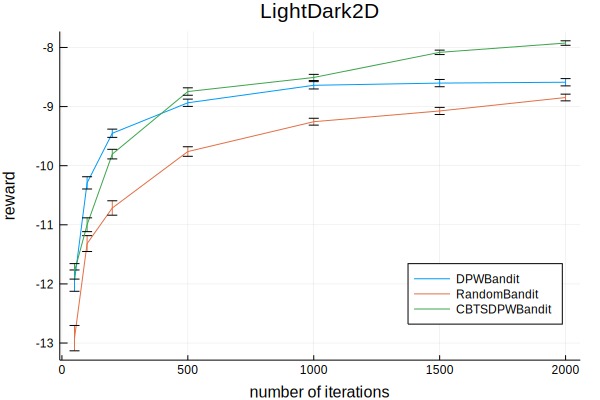

In [11]:
p=plot(result)

In [12]:
savefig(p, "./RvN_lightdark2d.pdf")